# Quickstart for Classification Models (Full Suite)

This notebooks provides a quick introduction to documenting a model using the ValidMind developer framework. We will use sample datasets provided by the library and train a simple classification model.

## Initialize ValidMind

In [1]:
%load_ext dotenv
%dotenv .env

import validmind as vm
import xgboost as xgb

vm.init(
  api_host = "http://localhost:3000/api/v1/tracking",
  project = "clhmm220k0006558hv20npy8z"
)

Connected to ValidMind. Project: Customer Churn Model - Initial Validation (clhmm220k0006558hv20npy8z)


## Load the Demo Dataset

In [2]:
# You can also import customer_churn like this:
from validmind.datasets.classification import customer_churn as demo_dataset
# from validmind.datasets.classification import taiwan_credit as demo_dataset

df = demo_dataset.load_data()

In [3]:
vm_dataset = vm.init_dataset(
    dataset=df,
    target_column=demo_dataset.target_column,
    class_labels=demo_dataset.class_labels
)

Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...


## Run the Full Data and Model Validation Test Suite

We will need to preprocess the dataset and produce the training, test and validation splits first.

### Prepocess the Raw Dataset

In [4]:
train_df, validation_df, test_df = demo_dataset.preprocess(df)

In [5]:
x_train = train_df.drop(demo_dataset.target_column, axis=1)
y_train = train_df[demo_dataset.target_column]
x_val = validation_df.drop(demo_dataset.target_column, axis=1)
y_val = validation_df[demo_dataset.target_column]

model = xgb.XGBClassifier(early_stopping_rounds=10)
model.set_params(
    eval_metric=["error", "logloss", "auc"],
)
model.fit(
    x_train,
    y_train,
    eval_set=[(x_val, y_val)],
    verbose=False,
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric=['error', 'logloss', 'auc'],
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None, ...)

In [6]:
vm_train_ds = vm.init_dataset(
    dataset=train_df,
    type="generic",
    target_column=demo_dataset.target_column
)

vm_test_ds = vm.init_dataset(
    dataset=test_df,
    type="generic",
    target_column=demo_dataset.target_column
)

vm_model = vm.init_model(
    model,
    train_ds=vm_train_ds,
    test_ds=vm_test_ds,
)

Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...
Pandas dataset detected. Initializing VM Dataset instance...
Inferring dataset types...


### Run the Full Suite

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

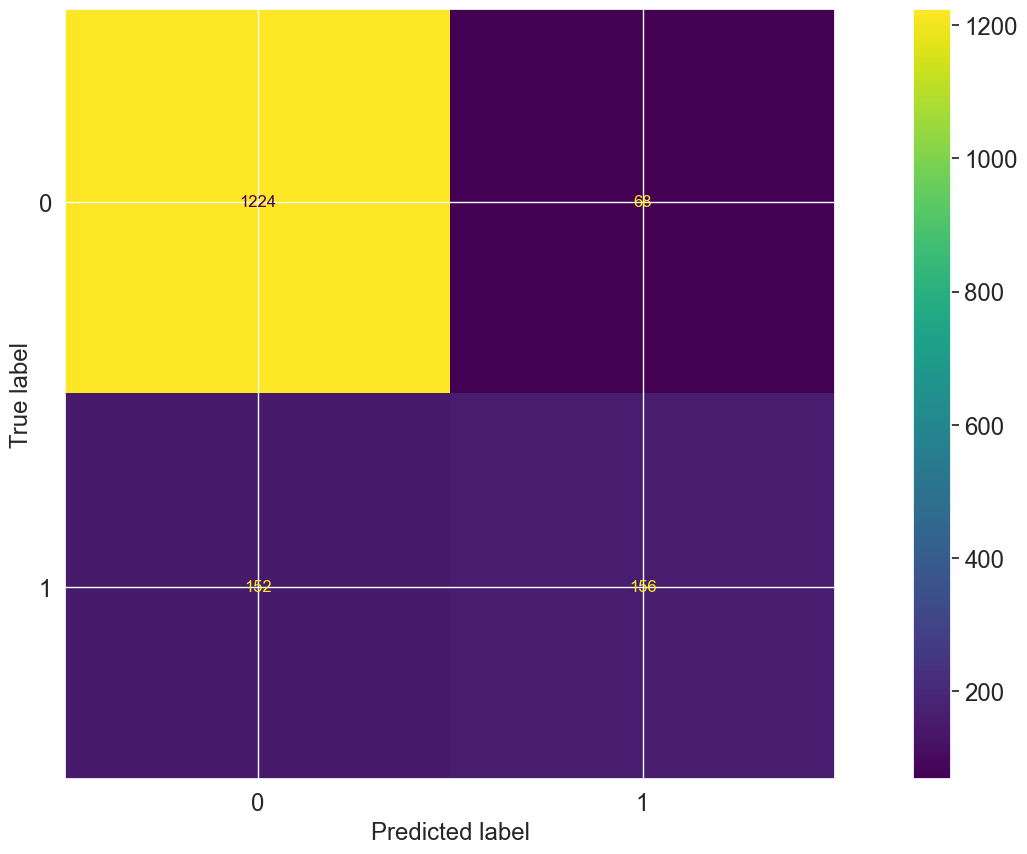

In [7]:
full_suite = vm.run_test_suite(
    "binary_classifier_full_suite",
    dataset=vm_dataset,
    model=vm_model
)